In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib
from matplotlib import font_manager
import matplotlib.patheffects as pe


In [3]:
%config InlineBackend.figure_formats = ['svg']
dpi = 300
matplotlib.rcParams['figure.dpi']= dpi

pd.set_option('display.max_rows', 200)

figsize = (8, 5)
matplotlib.rcParams['figure.figsize'] = figsize

# plot parameters

blue = '#3C608A'
lightgray = '#d3d8d6'
darkblue = '#2e4465'
darkgray = '#333638'
red = '#e43e47'
lightblue = '#3687e7'
mustard = '#D4AD50'
purple = '#5E233B'
pink = '#F87FAB'



fe = font_manager.FontEntry(
    fname= 'bpc_fonts/Redesign-3/Styrene/StyreneA-Black.otf',
    name='StyreneABlack')
font_manager.fontManager.ttflist.insert(0, fe) # or append is fine

fe = font_manager.FontEntry(
    fname= 'bpc_fonts/Redesign-3/Styrene/StyreneA-Medium.otf',
    name='StyreneAMedium')
font_manager.fontManager.ttflist.insert(0, fe) # or append is fine

fe = font_manager.FontEntry(
    fname='bpc_fonts/Redesign-3/Styrene/StyreneA-Regular.otf',
    name='StyreneARegular')
font_manager.fontManager.ttflist.insert(0, fe) # or append is fine

matplotlib.rcParams['font.family'] = 'StyreneARegular' # = 'your custom ttf font name'

ms = 5 # markersize

data_label_fontsize = 9.5



In [4]:
df = pd.read_csv('data/vv_capture_2025-07-23_14-12-58/cleaned_verifier_data.csv', converters={'FIPS code': str}).convert_dtypes()

# Non-VVSG equipment
non_voting_equipment = ['Paper Poll Book',
                        'Hand Counted Paper Ballots', 
                        'Commercial Electronic Poll Book',
                        'In-House Electronic Poll Book',
                        'Data Unavailable',
                        'Internet Voting: Email',
                        'Internet Voting: Web Portal',
                        'Internet Voting: Fax',
                        'Remote Ballot Marking System: Client-Side',
                        'Remote Ballot Marking System: Server-Side']

# VVSG equipment
voting_equipment = ['Ballot Marking Device', 
                            'Hand-Fed Optical Scanner',
                            'Batch-Fed Optical Scanner',
                            'DRE-Touchscreen',
                            'DRE-Push Button',
                            'DRE-Dial',
                            'Mechanical Lever Machine',
                            'Punch Card Voting System',
                            'Hybrid BMD/Tabulator',
                            'Hybrid Optical Scan/DRE',
                            'Hybrid Optical Scan/BMD']

# filter only for VVSG relevant equipment
df = df[df['Equipment Type'].isin(voting_equipment)]

# merge DRE categories
df.loc[df['Equipment Type'].str.startswith('DRE'), 'Equipment Type'] = 'DRE'
df['Manufacturer + Model'] = df['Manufacturer'] + ' ' + df['Model']

/var/folders/2f/3k2b0y_s79n84y37bcnb5t5h0000gn/T/ipykernel_62183/1971445286.py:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/vv_capture_2025-07-23_14-12-58/cleaned_verifier_data.csv', converters={'FIPS code': str}).convert_dtypes()


In [5]:
df['Election Day Marking Method'].value_counts()

Election Day Marking Method
Hand marked paper ballots and BMDs                                                                 80786
Hand marked paper ballots and DREs with VVPAT                                                      18894
DREs without VVPAT for all voters                                                                  12951
Ballot Marking Devices for all voters                                                               6293
DREs with VVPAT for all voters                                                                      3853
Hand marked paper ballots and DREs without VVPAT                                                    3751
Hand marked paper ballots; Direct recording assistive interface without VVPAT for accessibility     1238
Mechanical Lever Machine                                                                             576
Hand marked paper ballots, No accessible equipment                                                   258
Hand marked punch card ball

In [6]:
df['Equipment Type'].value_counts()

Equipment Type
Hand-Fed Optical Scanner     44910
Ballot Marking Device        42742
DRE                          23664
Batch-Fed Optical Scanner    12613
Hybrid Optical Scan/BMD       3712
Hybrid Optical Scan/DRE        618
Mechanical Lever Machine       269
Hybrid BMD/Tabulator           125
Punch Card Voting System        32
Name: count, dtype: Int64

In [7]:
df.columns

Index(['Year', 'FIPS code', 'State', 'Jurisdiction', 'Registered Voters',
       'Equipment Type', 'Manufacturer', 'Model', 'First Year in Use',
       'Years in Use', 'New Equipment', 'Final Year in Use', 'QR/Barcode',
       'VVPAT', 'Election Day Standard', 'Election Day Accessible',
       'Early Voting Standard', 'Early Voting Accessible',
       'Mail Ballot/Absentee Equipment', 'Notes on usage', 'Precincts',
       'Voting Location', 'All Mail Ballot?', 'Election Day Marking Method',
       'Election Day Tabulation', 'Manufacturer + Model'],
      dtype='object')

In [8]:
# estimate equipment quantities from EAVS data

# load equipment-per-voter rates, computed in cost_analysis.ipynb
per_voter_rates = pd.read_csv('data/equipment_per_voter_rates_by_marking_method.csv', index_col=0)
per_voter_rates

,dre_wo_vvpat_total,dre_w_vvpat_total,bmd_total,hand_fed_total,batch_fed_total
Election Day Marking Method,,,,,
Ballot Marking Devices for all voters,0.000012,0.000036,0.002672,0.000482,0.000009
DREs with VVPAT for all voters,0.000000,0.002704,0.000020,0.000008,0.000007
DREs without VVPAT for all voters,0.003137,0.000000,0.000000,0.000002,0.000000
Hand marked paper ballots and BMDs,0.000001,0.000002,0.000493,0.000520,0.000012
Hand marked paper ballots and DREs with VVPAT,0.000000,0.001078,0.000556,0.000000,0.000000
Hand marked paper ballots and DREs without VVPAT,0.000580,0.000000,0.000000,0.000601,0.000166
"Hand marked paper ballots, BMDs and DREs with VVPAT",0.000000,0.000237,0.000450,0.000470,0.000018
"Hand marked paper ballots, BMDs and DREs without VVPAT",0.000230,0.000000,0.001671,0.000246,0.000005
Hand marked paper ballots; Direct recording assistive interface without VVPAT for accessibility,0.000000,0.000000,0.000000,0.000846,0.000002


In [16]:
q = df.drop_duplicates(subset=['FIPS code', 'Year', 'Equipment Type'], keep='first')

In [17]:
# 1) Decide which per-voter-rate column each row should use
base_map = {
    "Ballot Marking Device": "bmd_total",
    "Hand-Fed Optical Scanner": "hand_fed_total",
    "Batch-Fed Optical Scanner": "batch_fed_total",
}

is_dre = q["Equipment Type"].eq("DRE")
method_lower = q["Election Day Marking Method"].fillna("").str.lower()

# DRE: default to wo_vvpat unless the method explicitly includes "with ... v(v)pat"
with_vvpat = (q['Equipment Type']=='DRE') & q['Election Day Marking Method'].str.contains('DREs with VVPAT')

rate_col = q["Equipment Type"].map(base_map)                       # non-DRE mappings
rate_col = rate_col.mask(is_dre, "dre_wo_vvpat_total")             # DRE default
rate_col = rate_col.mask(with_vvpat, "dre_w_vvpat_total")          # DRE with VVPAT override

# 2) Reshape per_voter_rates so we can join on (Election Day Marking Method, rate_col)
pvr_long = (
    per_voter_rates
      .reset_index(names=["Election Day Marking Method"])
      .melt(id_vars="Election Day Marking Method",
            var_name="rate_col",
            value_name="per_voter_rate")
)


# 3) Merge and compute Quantity (unknowns become 0)
q_with_rates = (
    q.assign(rate_col=rate_col)
     .merge(pvr_long, on=["Election Day Marking Method", "rate_col"], how="left")
)

q_with_rates["per_voter_rate"] = q_with_rates["per_voter_rate"].fillna(0)
q_with_rates["Quantity"] = q_with_rates["Registered Voters"].fillna(0) * q_with_rates["per_voter_rate"]

# keeping only original columns + Quantity:
df = q_with_rates[q.columns.tolist() + ["Quantity"]]



In [18]:
# show model counts by categary
 
df26 = df[df['Year'] == 2026]

# Count per Manufacturer + Model
counts = (
    df26.groupby(['Equipment Type', 'Manufacturer + Model'])
      .size()
      .reset_index(name='count')
)

# Total per Equipment Type
totals = counts.groupby('Equipment Type')['count'].sum().reset_index(name='total')

# Sort by total then breakdown counts
counts = counts.merge(totals, on='Equipment Type')
counts = counts.sort_values(['total', 'count', 'Manufacturer + Model'], ascending=[False, False, True])

# Build list with header rows inserted
rows = []
for etype, group in counts.groupby('Equipment Type', sort=False):
    total = group['total'].iloc[0]
    rows.append({'Equipment Type': f'=== {etype} (Total: {total}) ===', 'Manufacturer + Model': '', 'count': ''})
    rows.extend(group[['Equipment Type', 'Manufacturer + Model', 'count']].to_dict('records'))

# Create final DataFrame for display
final_df = pd.DataFrame(rows)
final_df


,Equipment Type,Manufacturer + Model,count
0,=== Ballot Marking Device (Total: 4997) ===,,
1,Ballot Marking Device,ES&S ExpressVote,2679
2,Ballot Marking Device,Democracy Live OmniBallot Tablet,542
3,Ballot Marking Device,ES&S AutoMARK,409
4,Ballot Marking Device,Dominion ImageCast X BMD,384
5,Ballot Marking Device,Hart InterCivic Verity Touch Writer,184
6,Ballot Marking Device,Hart InterCivic Verity Duo,181
7,Ballot Marking Device,Unisyn OpenElect FVT,175
8,Ballot Marking Device,IVS Inspire Ballot Marking System,169
9,Ballot Marking Device,Clear Ballot ClearAccess,108


## Histogram of equipment age (weighted by equipment counts)

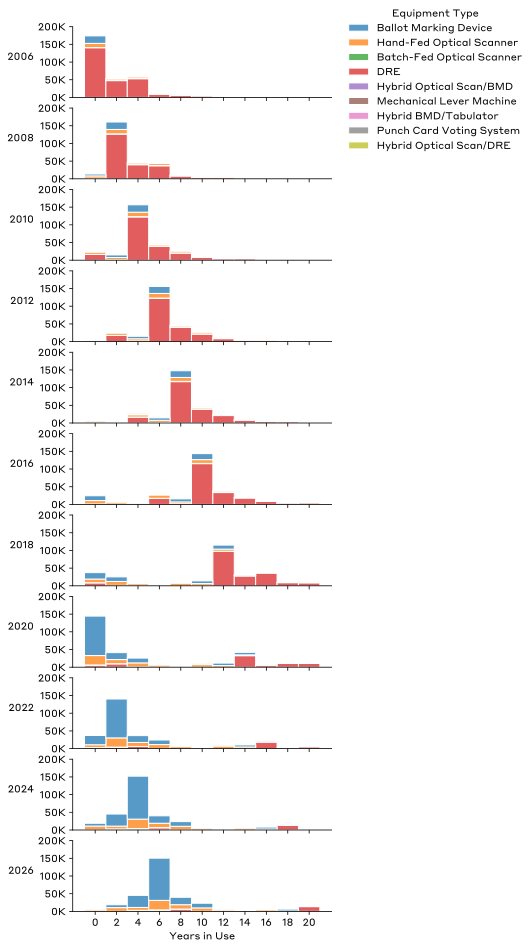

In [12]:
bins=np.arange(0,23,2)
midpoints = (bins[:-1] + bins[1:]) // 2
g = sns.displot(data=q, row='Year', x='Years in Use', kind='hist', height=1.2, aspect=4, bins=list(bins), weights='Quantity', hue='Equipment Type', multiple='stack', edgecolor='white')
g.legend.set_loc('upper right')

for ax in g.axes:
    ax = ax[0]
    ax.set_yticks(np.linspace(0, 2e5, 5))
    ax.set_xticks(midpoints)
    ax.set_xticklabels(bins[:-1], color='black')
    ax.set_ylabel(ax.title.get_text()[-4:], rotation=0, ha='right')
    ax.set_title('')  # Remove the title
    ax.get_yaxis().set_major_formatter(
        matplotlib.ticker.FuncFormatter(lambda x, _: f'{int(x/1000)}K'))


plt.subplots_adjust(hspace=0.15)


# Average age of equipment in 2026 (weighted by equipment count)

In [24]:
voting_df_26 = df[df["Year"] == 2026]

state_eq_len = (
    voting_df_26
    .groupby("State")
    .apply(lambda g: (g["Years in Use"] * g["Quantity"]).sum() / g["Quantity"].sum(), include_groups=False)
    .reset_index(name="Weighted Years in Use")
)
state_eq_len.sort_values(['Weighted Years in Use'], ascending=False).round(1)

,State,Weighted Years in Use
19,Louisiana,23.9
38,Oklahoma,14.0
41,Puerto Rico,13.9
33,New York,13.8
36,Northern Mariana Islands,13.8
15,Indiana,13.2
22,Massachusetts,12.5
32,New Mexico,11.7
45,Tennessee,11.2
20,Maine,10.9


In [43]:
# of voters per piece of equipment. (OK, DE, NM are outliers to deal with. Hybrid equipment is part of the problem.)
voting_df_26.groupby('State')['Registered Voters'].sum().div(voting_df_26.groupby('State')['Quantity'].sum(), axis=0).sort_values(ascending=False).apply(int)

State
Oklahoma                    1221105
Delaware                     228761
New Mexico                   200557
Oregon                         7385
Northern Mariana Islands       3959
Guam                           3959
Washington                     3959
Colorado                       3959
Nebraska                       3878
South Dakota                   3586
Montana                        3524
Alaska                         3404
New York                       3215
Arizona                        3130
Minnesota                      3080
Florida                        3071
North Dakota                   2927
Hawaii                         2927
Rhode Island                   2927
District of Columbia           2927
Maryland                       2727
Iowa                           2694
Virginia                       2665
Michigan                       2619
Pennsylvania                   2525
Illinois                       2463
Missouri                       2437
Alabama               

# Do larger jurisdictions have newer equipment?
No. Analysis below.

In [44]:
avg = (
    voting_df_26
    .groupby("FIPS code")
    .apply(lambda g: pd.Series({
        "Registered Voters": g["Registered Voters"].mean(),
        "Years in Use": (g["Years in Use"] * g["Quantity"]).sum() / g["Quantity"].sum()
    }))
    .reset_index()
)
avg

/var/folders/2f/3k2b0y_s79n84y37bcnb5t5h0000gn/T/ipykernel_62183/1021537860.py:6: RuntimeWarning: invalid value encountered in scalar divide
  "Years in Use": (g["Years in Use"] * g["Quantity"]).sum() / g["Quantity"].sum()
/var/folders/2f/3k2b0y_s79n84y37bcnb5t5h0000gn/T/ipykernel_62183/1021537860.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: pd.Series({


,FIPS code,Registered Voters,Years in Use
0,0100100000,41791.0,8.104371
1,0100300000,180929.0,8.995600
2,0100500000,15697.0,8.104371
3,0100700000,14304.0,5.026093
4,0100900000,41203.0,8.104371
...,...,...,...
6368,5604500000,3426.0,6.000000
6369,6600000000,62091.0,5.905219
6370,6900000000,18401.0,13.810437
6371,7200000000,1987317.0,13.895629


/var/folders/2f/3k2b0y_s79n84y37bcnb5t5h0000gn/T/ipykernel_62183/382879481.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=ax.get_xticklabels(), color='black')
/var/folders/2f/3k2b0y_s79n84y37bcnb5t5h0000gn/T/ipykernel_62183/382879481.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels=ax.get_yticklabels(), color='black')


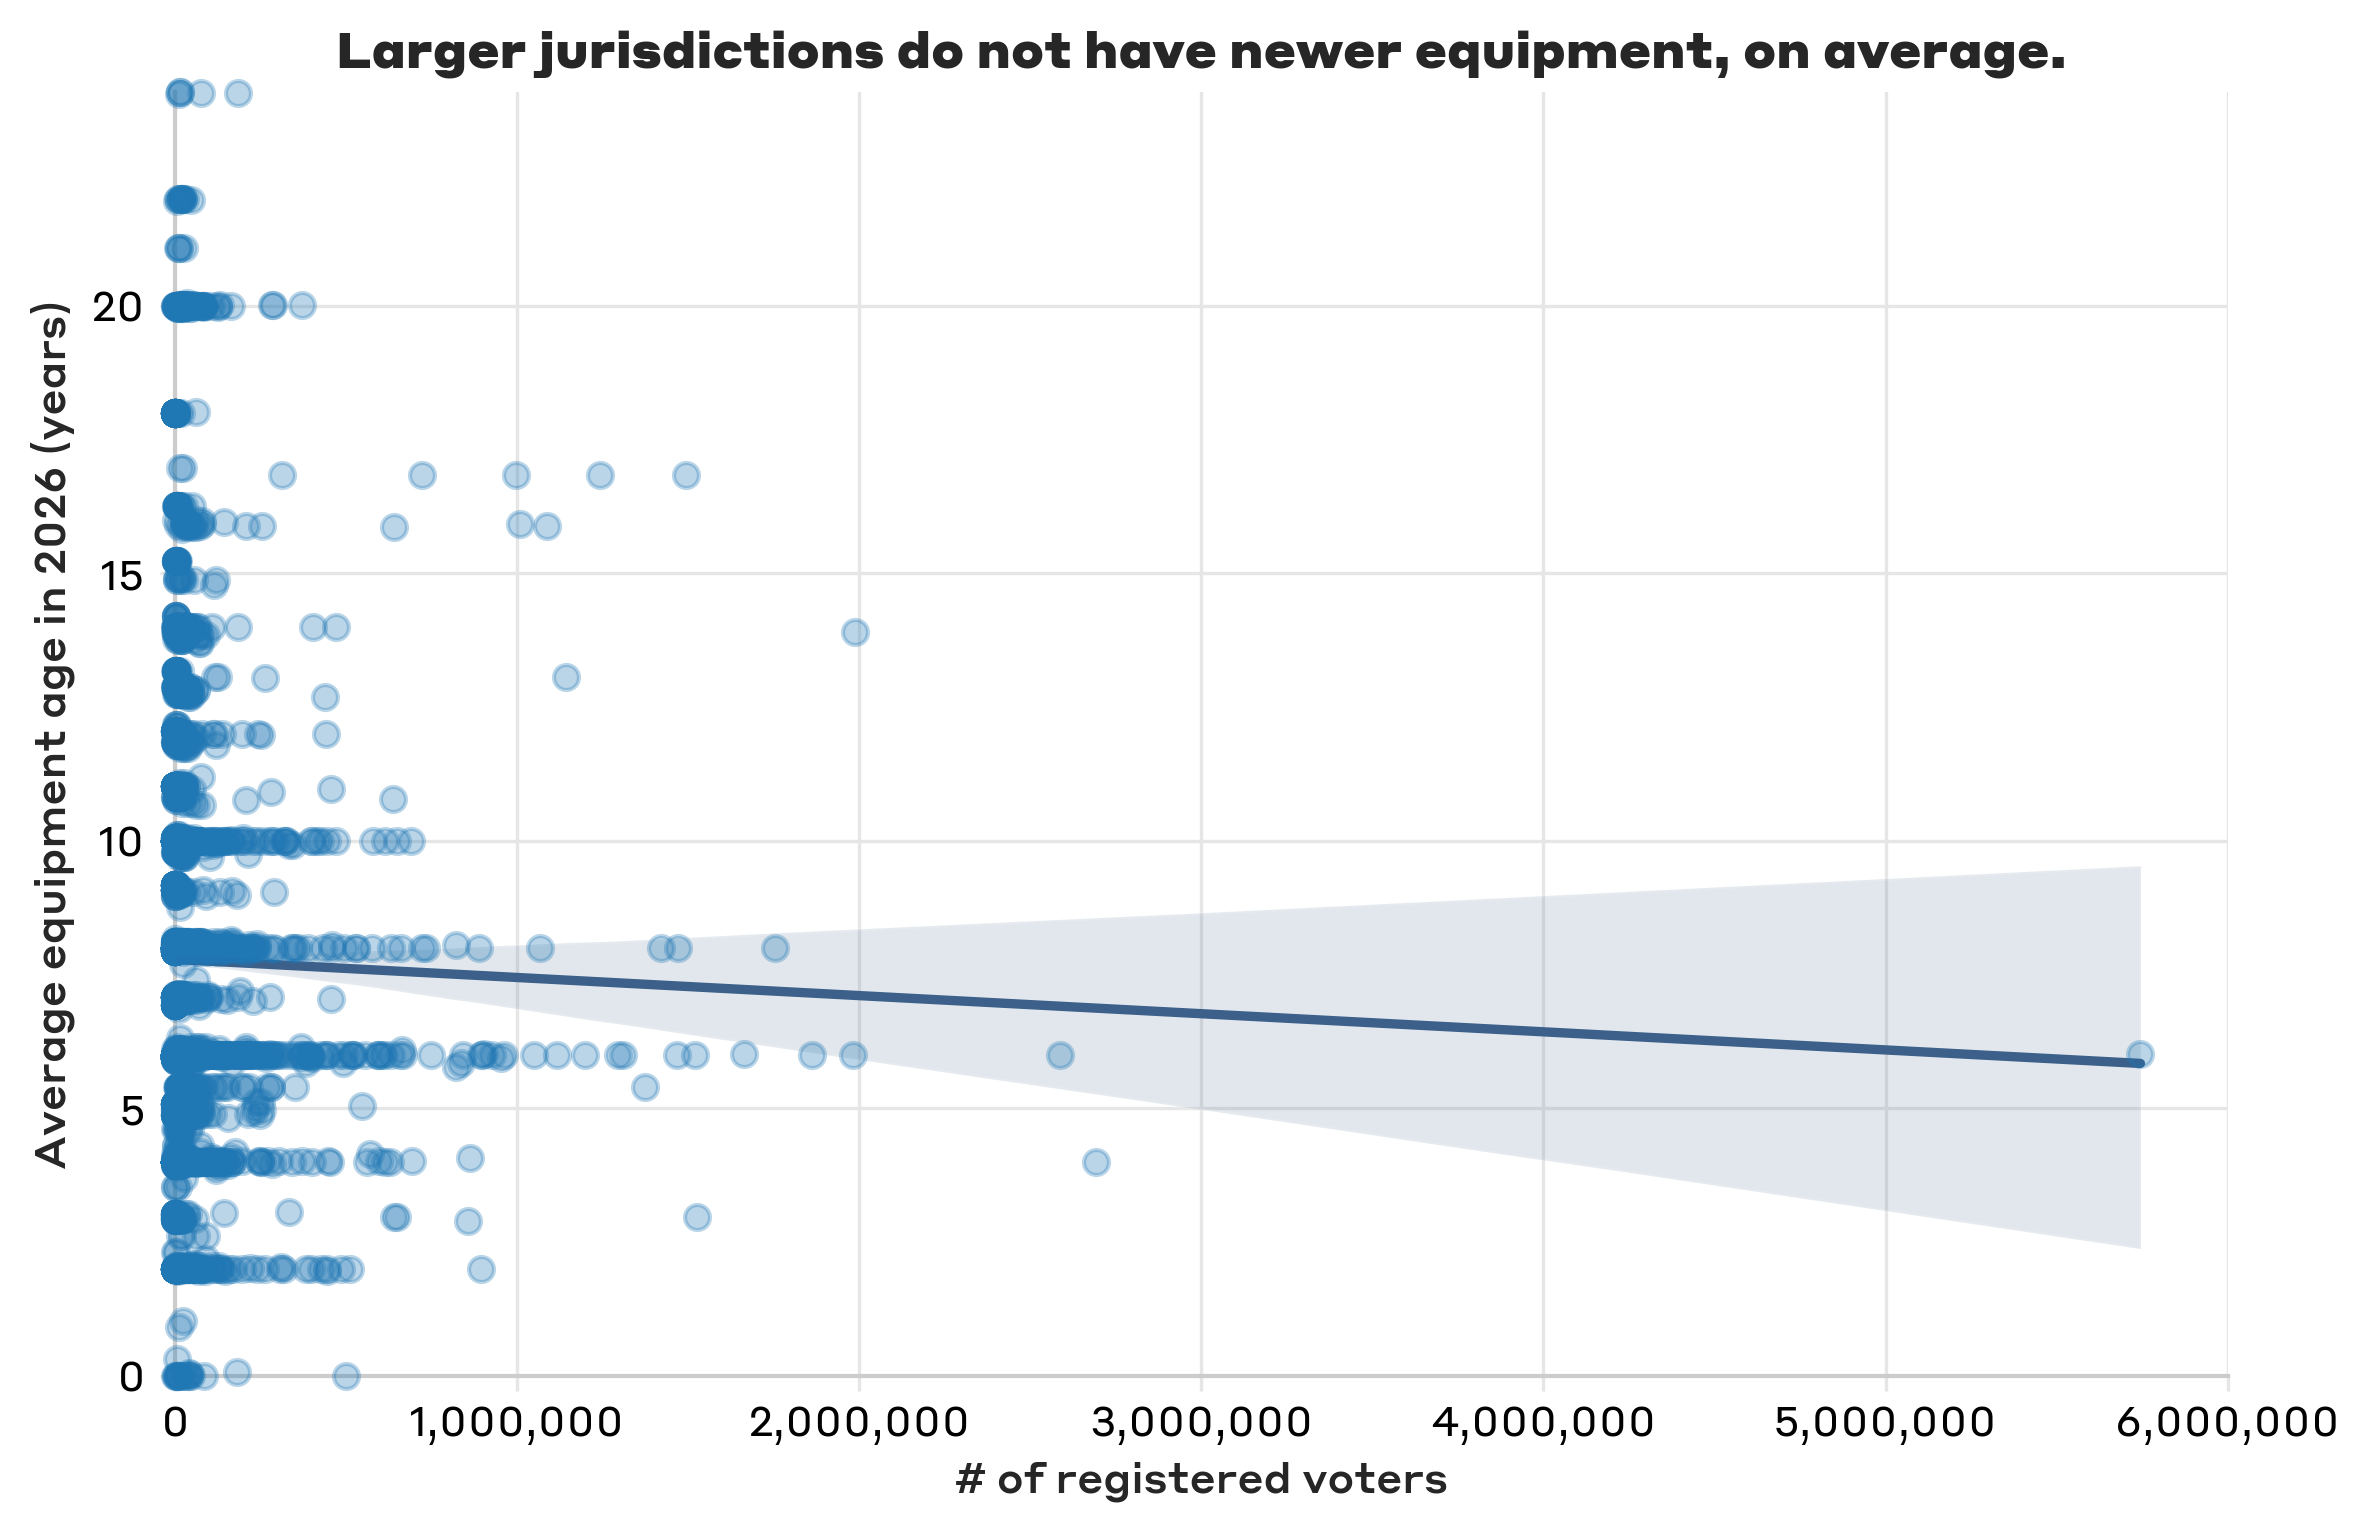

In [45]:
%config InlineBackend.figure_formats = ['png']

# Set up the plot style
axis_width = 1
sns.set_style("whitegrid", {"grid.color": ".9",
                            "font.family": "StyreneARegular",
                            'axes.spines.top': False,
                            'axes.spines.right': False,
                            'xtick.bottom': True,
                            'ytick.left': True,
                            'xtick.color': '.9',
                            'ytick.color': '.9'})
# Create the scatterplot with regression line
# plt.figure(figsize=figsize)
ax = sns.regplot(
    data=avg,
    x="Registered Voters",
    y="Years in Use",
    scatter_kws={"alpha": 0.3, 'clip_on': False, 'zorder': 10},
    line_kws={"color": blue},
    ci=95,  # Confidence interval for regression line
)
for spine in ['left', 'bottom']:
    ax.spines[spine].set_linewidth(axis_width)

plt.xlabel("# of registered voters", fontname='StyreneAMedium')
plt.ylabel("Average equipment age in 2026 (years)", fontname='StyreneAMedium')
ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.xlim([0, 6e6])
plt.ylim([0, 24])
ax.set_xticklabels(labels=ax.get_xticklabels(), color='black')
ax.set_yticklabels(labels=ax.get_yticklabels(), color='black')
plt.tight_layout()
plt.title("Larger jurisdictions do not have newer equipment, on average.", fontname='StyreneABlack');
plt.savefig('figs/age_vs_jurisdiction_size.png', bbox_inches='tight', dpi=300)

# Age of equipment over time

/var/folders/2f/3k2b0y_s79n84y37bcnb5t5h0000gn/T/ipykernel_62183/3472615231.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels=ax.get_yticklabels(), color='black')


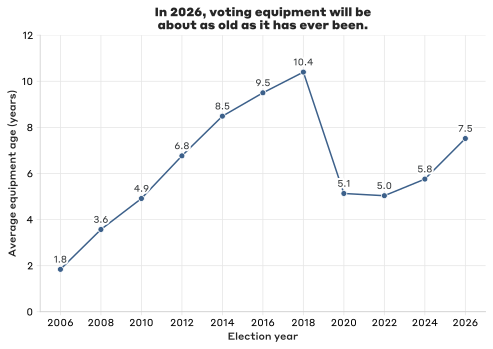

In [48]:
# Compute weighted average years in use per year
filtered_voting_df = df.dropna(subset=["Years in Use", "Registered Voters", 'Quantity'])

years_in_use = (
    filtered_voting_df.groupby("Year")
    .apply(lambda x: np.average(x["Years in Use"], weights=x["Quantity"]), include_groups=False)
    .reset_index(name="Weighted Years in Use")
)

# Plot
%config InlineBackend.figure_formats = ['svg']

sns.lineplot(data=years_in_use, x="Year", y="Weighted Years in Use", marker="o",
        linestyle="-", color=blue, linewidth=1.5)

ax = plt.gca()

# Add data labels
for i, value in enumerate(years_in_use["Weighted Years in Use"]):
    ax.text(years_in_use["Year"][i], value +0.2, f"{value:.1f}", ha="center", va="bottom",
            fontsize=data_label_fontsize, color=darkgray,
            path_effects=[pe.withStroke(linewidth=4, foreground='white')])

# Formatting
ax.set_ylabel("Average equipment age (years)", fontname='StyreneAMedium')
ax.set_xlabel("Election year", fontname='StyreneAMedium')
ax.set_title("In 2026, voting equipment will be\nabout as old as it has ever been.", fontname='StyreneABlack')

# Ensure x-axis ticks are formatted correctly
plt.xticks(years_in_use["Year"], rotation=0, ha="center")
ax.set_xticklabels(labels=ax.get_xticklabels(), color='black')
ax.set_yticklabels(labels=ax.get_yticklabels(), color='black')
plt.ylim(0, 12)
plt.savefig("figs/weighted_avg_years_in_use_over_time.png", bbox_inches='tight', dpi=300)
plt.show()


(0.0, 50.0)

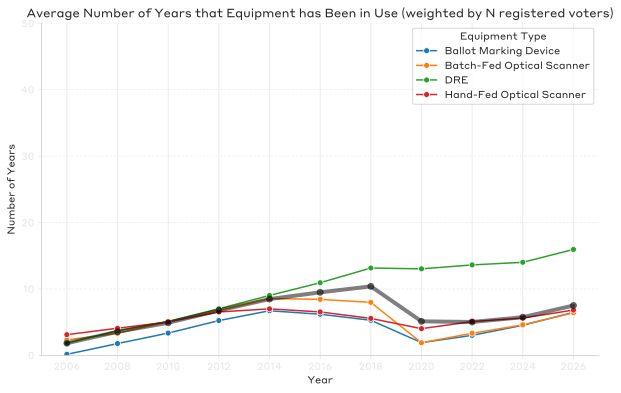

In [ ]:
# same as above, but with breakout by equipment type

years_in_use = (
    filtered_voting_df.groupby("Year")
    .apply(lambda x: np.average(x["Years in Use"], weights=x["Quantity"]), include_groups=False)
    .reset_index(name="Weighted Years in Use")
)

include = ~filtered_voting_df['Equipment Type'].str.contains('Hybrid|Punch|Lever')

years_in_use_breakout = (
    filtered_voting_df[include].groupby(['Year', 'Equipment Type'])
    .apply(lambda x: np.average(x["Years in Use"], weights=x["Quantity"]), include_groups=False)
    .reset_index(name="Weighted Years in Use")
)

# Plot with seaborn
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(ax=ax, data=years_in_use_breakout, x='Year', y='Weighted Years in Use', hue='Equipment Type', marker='o')

ax.plot(years_in_use["Year"], years_in_use["Weighted Years in Use"], marker="o", linestyle="-", color='black', linewidth=4, alpha=0.5)

# Formatting
ax.set_ylabel("Number of Years", fontsize=10)
ax.set_xlabel("Year", fontsize=10)
ax.set_title("Average Number of Years that Equipment has Been in Use (weighted by N registered voters)", fontsize=12)
ax.grid(axis="y", linestyle="--", alpha=0.7)

# Ensure x-axis ticks are formatted correctly
plt.xticks(years_in_use["Year"], rotation=0, ha="center")

plt.ylim(0, 50)

# try to understand this better. DREs got younger in 2020 because old ones were decommissioned?


In [93]:
# Split out just the rows with New Equipment = True
new_eq = df[df['New Equipment'] == True].copy()

# Create a shifted Year column for lookup
new_eq['Prev Year'] = new_eq['Year'] - 2

# Merge with the original dataframe to find matches from two years earlier
merged = pd.merge(
    new_eq,
    df,
    left_on=['State', 'Jurisdiction', 'Model', 'Prev Year'],
    right_on=['State', 'Jurisdiction', 'Model', 'Year'],
    suffixes=('_new', '_prev')
)

# Optional: select only columns of interest
result = merged[[
    'State', 'Jurisdiction', 'Model',
    'Year_prev', 'New Equipment_prev',
    'Year_new', 'New Equipment_new'
]]

# Sort or inspect
result = result.sort_values(by=['State', 'Jurisdiction', 'Model', 'Year_new'])


## Compare age of current equipment to typical age at retirement (weighted by quantity)

In [98]:

# Function to calculate weighted average and weighted std
def weighted_stats(group):
    weights = group["Quantity"]
    values = group["Years in Use"]
    
    # Weighted average
    avg = np.average(values, weights=weights)
    
    # Weighted standard deviation
    variance = np.average((values - avg)**2, weights=weights)
    std_dev = np.sqrt(variance)

    N = len(group)
    
    return pd.Series({
        "Weighted Avg Age": avg,
        "Weighted Std Age": std_dev,
        "N": N
    })



filtered_df = df.dropna(subset=['Quantity', 'Years in Use', 'Equipment Type'])
include = ~filtered_df['Equipment Type'].str.contains('Hybrid|Punch|Lever')
filtered_df = filtered_df[include]

# Apply function by Equipment Type
age_at_retirement = filtered_df[filtered_df['Final Year in Use']==True].groupby("Equipment Type").apply(weighted_stats, include_groups=False).reset_index()

# View result
age_at_retirement

current_age = filtered_df[filtered_df['Year'] == 2026].groupby("Equipment Type").apply(weighted_stats, include_groups=False).reset_index()

retirement_df = pd.merge(current_age, age_at_retirement, on='Equipment Type', how='left', suffixes=(' Current', ' At Retirement'))
retirement_df = retirement_df.loc[[2, 0, 1, 3]].reset_index(drop=True)
retirement_df.round(1)

,Equipment Type,Weighted Avg Age Current,Weighted Std Age Current,N Current,Weighted Avg Age At Retirement,Weighted Std Age At Retirement,N At Retirement
0,DRE,16.0,8.1,349.0,9.6,6.0,4305.0
1,Ballot Marking Device,6.5,3.0,4997.0,9.4,4.7,3536.0
2,Batch-Fed Optical Scanner,6.4,2.6,1556.0,9.4,4.9,1299.0
3,Hand-Fed Optical Scanner,6.8,4.0,4335.0,9.8,5.1,5970.0


In [99]:
retirement_df['delta'] = retirement_df['Weighted Avg Age Current'] - retirement_df['Weighted Avg Age At Retirement']

/var/folders/2f/3k2b0y_s79n84y37bcnb5t5h0000gn/T/ipykernel_62183/38212346.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(np.arange(0, 20, 2), color='black')


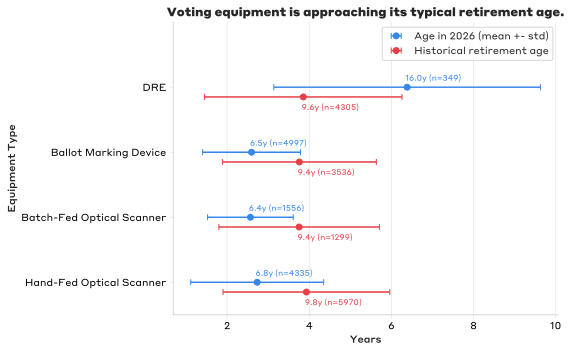

In [129]:
fig, ax = plt.subplots()
y = np.arange(len(retirement_df))

# Plot current age
ax.errorbar(retirement_df['Weighted Avg Age Current'], y, xerr=retirement_df['Weighted Std Age Current'],
            fmt='o', color=lightblue, label='Age in 2026 (mean +- std)', capsize=3,
            linewidth=1.5)

# Annotate current age
for i, row in retirement_df.iterrows():
    label = f"{row['Weighted Avg Age Current']:.1f}y (n={int(row['N Current'])})"
    ax.text(row['Weighted Avg Age Current'] - 0.1, y[i] - 0.1, label, color=lightblue, fontsize=8)

# Plot retirement age
for i, row in retirement_df.iterrows():
    if pd.notnull(row['Weighted Avg Age At Retirement']):
        label = 'Historical retirement age' if i == 0 else ''
        ax.errorbar(row['Weighted Avg Age At Retirement'], y[i] + 0.15,
                    xerr=row['Weighted Std Age At Retirement'], fmt='o', label=label,
                    color=red, capsize=3)

# Annotate retirement age
for i, row in retirement_df.iterrows():
    label = f"{row['Weighted Avg Age At Retirement']:.1f}y (n={int(row['N At Retirement'])})"
    ax.text(row['Weighted Avg Age At Retirement'] - 0.1, y[i] + 0.35, label, color=red, fontsize=8)


# Formatting
ax.set_yticks(y)
ax.set_yticklabels(retirement_df['Equipment Type'], color='black')
ax.set_xticklabels(np.arange(0, 20, 2), color='black')
ax.invert_yaxis()  # So first row is on top
ax.set_xlabel('Years', fontname='StyreneAMedium')
ax.set_ylabel('Equipment Type', fontname='StyreneAMedium')
ax.set_ylim([3.5, -1])
ax.set_title('Voting equipment is approaching its typical retirement age.', fontname='StyreneABlack')
ax.grid(True, axis='x')
ax.grid(False, axis='y')
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig('figs/avg_age_and_retirement_age.png', bbox_inches='tight', dpi=300)


/var/folders/2f/3k2b0y_s79n84y37bcnb5t5h0000gn/T/ipykernel_62183/1117331961.py:66: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=ax.get_xticklabels(), color='black')


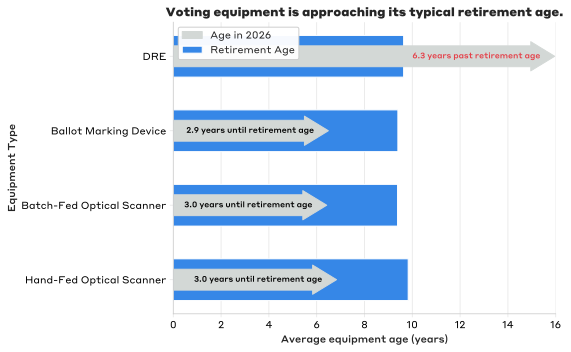

In [219]:
fig, ax = plt.subplots()

bar_width = 0.56
x = np.arange(len(retirement_df))

# Plot bars
# age_bars = ax.barh(x - bar_width/2, retirement_df["Weighted Avg Age Current"], height=bar_width, label="Age in 2026",
#                    color=lightgray)
retirement_bars = ax.barh(x, retirement_df["Weighted Avg Age At Retirement"], height=bar_width, label="Retirement Age",
                          color=lightblue)

for i, row in retirement_df.iterrows():
    # Arrow for "Age in 2026" (gray)
    ax.arrow(
        0,                             # start x
        i,                             # start y
        row["Weighted Avg Age Current"],  # length in x direction
        0,                             # no vertical displacement
        width=bar_width * 0.5,         # "fatness" of shaft
        head_width=bar_width * 0.7,    # arrowhead width
        head_length=1,                 # arrowhead length in data coords
        fc=lightgray, ec=lightgray,
        length_includes_head=True,
        label='Age in 2026' if i == 0 else None
    )
    
    # Arrow for "Retirement Age" (blue)
    # ax.arrow(
    #     0,
    #     i + bar_width/2,
    #     row["Weighted Avg Age At Retirement"],
    #     0,
    #     width=bar_width * 0.8,
    #     head_width=bar_width * 1.2,
    #     head_length=2,
    #     fc=lightblue, ec=lightblue,
    #     length_includes_head=True
    # )



# Annotate differences
for i, row in retirement_df.iterrows():
    # Determine which is smaller to anchor the label
    end_x  = row["Weighted Avg Age Current"]
    y = i
    if row['delta'] < 0:
        color = 'black'
    else:
        color = red
    
    ax.annotate(
        f"{abs(row['delta']):.1f} years {'past' if row['delta'] > 0 else 'until'} retirement age",
        xy=(end_x-0.6, y),
        ha='right', va='center',
        fontsize=8,
        color=color,
        fontname='StyreneAMedium',
        # bbox=dict(boxstyle="round,pad=0.2", edgecolor='gray', facecolor='white', alpha=0.7)
    )

# Formatting
ax.set_yticks(x)
ax.set_yticklabels(retirement_df["Equipment Type"], color='black')
ax.set_xlim([0, 16])
ax.set_xticklabels(labels=ax.get_xticklabels(), color='black')
ax.invert_yaxis()
ax.set_xlabel("Average equipment age (years)", fontname='StyreneAMedium')
ax.set_ylabel("Equipment Type", fontname='StyreneAMedium')
ax.set_title("Voting equipment is approaching its typical retirement age.", fontname='StyreneABlack')
ax.legend(loc='upper left',framealpha=0.95)
ax.grid(False, axis='y')
ax.grid(True, axis='x')

plt.tight_layout()
plt.savefig('figs/avg_age_and_retirement_age_small.png', bbox_inches='tight', dpi=300)

# New equipment acquisitions

/var/folders/2f/3k2b0y_s79n84y37bcnb5t5h0000gn/T/ipykernel_62183/642177849.py:11: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  ax = sns.lineplot(
/var/folders/2f/3k2b0y_s79n84y37bcnb5t5h0000gn/T/ipykernel_62183/642177849.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels=plt.gca().get_yticklabels(), color='black')


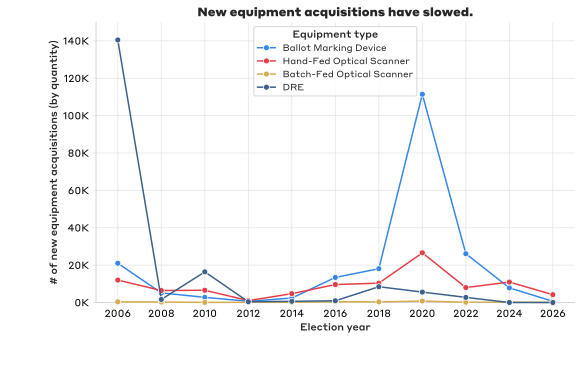

In [ ]:
# Group by year and equipment type, summing Quantity instead of row count
df_grouped = (
    df[(df['New Equipment'])]
    .groupby(['Year', 'Equipment Type'])['Quantity']
    .sum()
    .reset_index(name='Quantity')
)

palette = [lightblue, red, mustard, blue, lightgray, pink, purple, darkblue]

ax = sns.lineplot(
    data=df_grouped,
    x='Year', y='Quantity',
    hue='Equipment Type',
    marker='o', linewidth=1.5,
    palette=palette,
    hue_order=[
        'Ballot Marking Device',
        'Hand-Fed Optical Scanner',
        'Batch-Fed Optical Scanner',
        'DRE',
    ],
    clip_on=False,
    zorder=10
)


ax.legend(
    title="Equipment type",
    title_fontproperties={'family': 'StyreneAMedium', 'size': 10},
    fontsize=9,
    loc='upper center'

)
ax.set_title('New equipment acquisitions have slowed.', fontname='StyreneABlack')
ax.set_xlabel('Election year', fontname='StyreneAMedium')
ax.set_ylabel('# of new equipment acquisitions (by quantity)', fontname='StyreneAMedium')
ax.set_xticks(sorted(df['Year'].unique()))
ax.set_xticklabels(labels=plt.gca().get_xticklabels(), color='black')
plt.ylim([0, 150e3])
ax.set_yticklabels(labels=plt.gca().get_yticklabels(), color='black')
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, _: f'{int(x/1000)}K'))
plt.grid(True)
plt.tight_layout()
plt.savefig('figs/new_equipment_acquisitions_by_type.png', bbox_inches='tight', dpi=300)

# lots of states (GA and SC) and counties (in CA and TX) went BMD for all in 2020.